In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/HMEQ.csv', engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [6]:
# 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
# 설명변수, 목표변수 나눌것
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

In [8]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.963
Accuracy on test set : 0.941


In [9]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [11]:
train_accuracy=[]
test_accuracy=[]
# laerning_rate 합습률 변경 : 0.1~0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['Learning Rate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [12]:
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


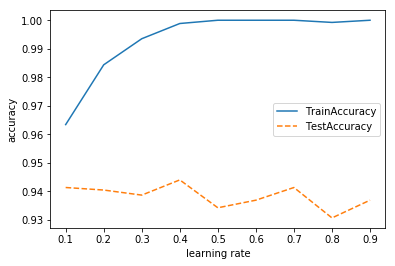

In [13]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_lr, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

In [14]:
train_accuracy=[]
test_accuracy=[]
# n_estimators 트리 수 변경 : 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [15]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.940
7,80,0.960,0.940
8,90,0.961,0.940
9,100,0.963,0.941


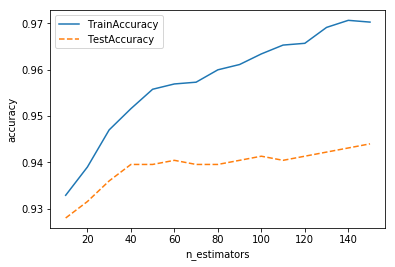

In [16]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [17]:
train_accuracy=[]
test_accuracy=[]
# n_estimators 트리 수 변경 : 10~150
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators=100, learning_rate=0.1,
                                    random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [18]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.992,0.941
5,6,0.998,0.949
6,7,1.000,0.946
7,8,1.000,0.948
8,9,1.000,0.948
9,10,1.000,0.947


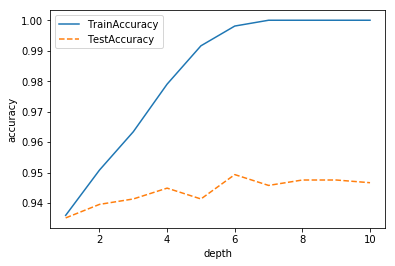

In [19]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()

In [20]:
train_accuracy=[]
test_accuracy=[]
# min_samples_split 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 4, n_estimators=100, 
                                    learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [21]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.976,0.942
1,30,0.974,0.942
2,40,0.973,0.937
3,50,0.969,0.941
4,60,0.973,0.941
5,70,0.969,0.943
6,80,0.968,0.943
7,90,0.966,0.941
8,100,0.963,0.940


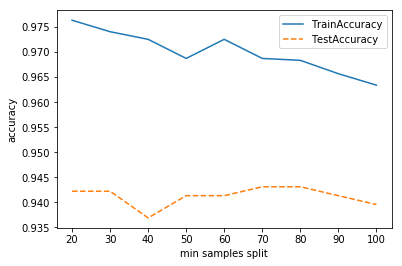

In [22]:
plt.plot(para_split, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples split')
plt.legend()

In [23]:
train_accuracy=[]
test_accuracy=[]
# min_samples_leaf 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    gb = GradientBoostingClassifier(min_samples_leaf= v_min_samples_leaf, max_depth = 4, n_estimators=100, 
                                    learning_rate=0.1, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [24]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.977,0.946
1,20,0.970,0.942
2,30,0.970,0.942
3,40,0.963,0.940
4,50,0.960,0.942
5,60,0.958,0.939
6,70,0.958,0.937
7,80,0.955,0.940
8,90,0.950,0.936
9,100,0.948,0.938


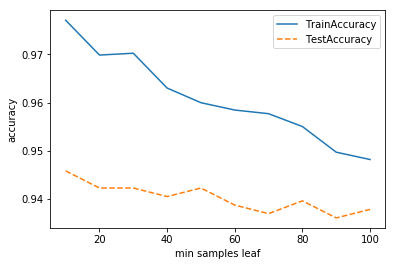

In [25]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('min samples leaf')
plt.legend()

In [26]:
# 최종 모델
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100,
                                     learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# 예측
y_pred = gb_final.predict(df_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
# confusion matrix
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.977
Accuracy on test set : 0.946
Confusion matrix : 
[[1018    3]
 [  58   46]]


In [28]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_
# df_featrue_importances의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '설명변수')

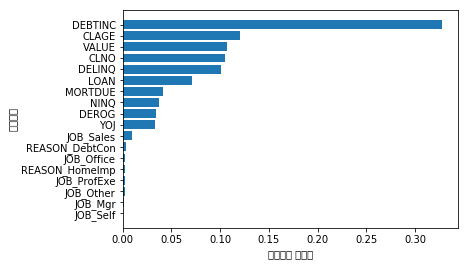

In [29]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [30]:
estimator = GradientBoostingClassifier(n_estimators=100, random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {'learning_rate' : para_lr, 'max_depth' : para_depth, 'min_samples_leaf' : para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_gb = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)
print('best estimator model : \n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_gb.best_params_))
print('\nbest score : \n{}'.format(grid_gb.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

best parameter : 
{'learning_rate': 0.4, 'max_depth': 6, 'min_samples_leaf': 10}

best score : 
0.95


## 실습

In [31]:
df_tele = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/통신고객이탈.csv', engine='python')
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [32]:
df_tele.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [33]:
# 명목형 변수들의 distinct한 값의 수
obj_cols = df_tele.select_dtypes('object').columns
for col in obj_cols:
    _n = len(df_tele[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [36]:
# CHURN 변수 데이터 전처리
df_tele['CHURN'] = np.where(df_tele['CHURN'] == 'Active', 0, 1)
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [37]:
df_tele.drop('CUSTOMER_ID', axis=1, inplace=True)

In [38]:
# get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_tele_dummy = pd.get_dummies(df_tele)
# 더미변수 생성도니 데이터의 상위 5개 row를 확인
df_tele_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# 설명변수, 목표변수 나눌것
df_tele_x = df_tele_dummy.drop('CHURN', axis=1, inplace=False)
df_tele_y = df_tele_dummy['CHURN']

# train_test_split
dft_train_x, dft_test_x, dft_train_y, dft_test_y = train_test_split(df_tele_x, df_tele_y, test_size=0.3, random_state=1234)

In [41]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncustomized = GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(dft_train_x, dft_train_y)
# train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(dft_train_x, dft_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(dft_test_x, dft_test_y)))

Accuracy on training set : 0.971
Accuracy on test set : 0.885


In [42]:
gb_uncustomized

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1234,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
train_accuracy=[]
test_accuracy=[]
# laerning_rate 합습률 변경 : 0.1~0.9
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=1234)
    gb.fit(dft_train_x, dft_train_y)
    train_accuracy.append(gb.score(dft_train_x, dft_train_y))
    test_accuracy.append(gb.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr['Learning Rate'] = para_lr
df_accuracy_lr['TrainAccuracy'] = train_accuracy
df_accuracy_lr['TestAccuracy'] = test_accuracy

In [44]:
df_accuracy_lr.round(3)

,Learning Rate,TrainAccuracy,TestAccuracy
0,0.1,0.971,0.885
1,0.2,0.998,0.885
2,0.3,1.000,0.892
3,0.4,1.000,0.860
4,0.5,1.000,0.878
5,0.6,1.000,0.882
6,0.7,1.000,0.875
7,0.8,1.000,0.885
8,0.9,1.000,0.853


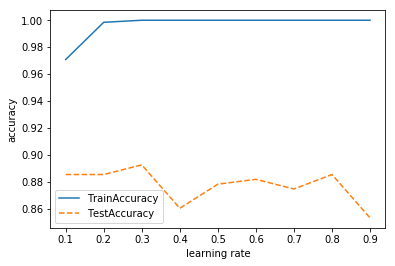

In [45]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_lr, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('learning rate')
plt.legend()

In [46]:
train_accuracy=[]
test_accuracy=[]
# n_estimators 트리 수 변경 : 10~150
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.3, random_state=1234)
    gb.fit(dft_train_x, dft_train_y)
    train_accuracy.append(gb.score(dft_train_x, dft_train_y))
    test_accuracy.append(gb.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [47]:
df_accuracy_n.round(3)

,Estimators,TrainAccuracy,TestAccuracy
0,10,0.942,0.885
1,20,0.965,0.896
2,30,0.972,0.892
3,40,0.988,0.892
4,50,0.992,0.892
5,60,0.997,0.892
6,70,0.998,0.892
7,80,1.000,0.889
8,90,1.000,0.892
9,100,1.000,0.889


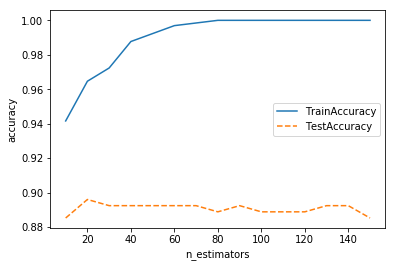

In [48]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='TrainAccuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='TestAccuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()